In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 데스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # 학습과정 loss, acc 시작화
# quiz에서는 scale 조정, train_test_split 등을 추가

import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [3]:
# 1. 데이터셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

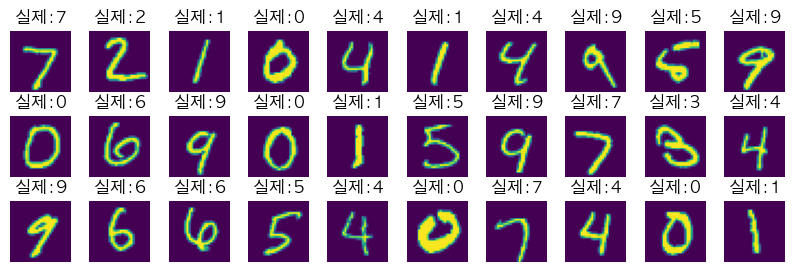

In [4]:
plt_row = 3
plt_col = 10

# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc('font', family="AppleGothic") # window에서 한글 시각화
# plt.rc('font', family='NanumBarunGothic') # 코랩에서 한글 시각화

fig, axes =plt.subplots(plt_row, plt_col)

# # axes[0,0].imshow(X_test[0].reshape(width, height))
# axes[0,0].imshow(X_test[0])
# axes[0,0].axis('off')
# title='실재:{}'.format(y_test[0])
# axes[0,0].set_title(title)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
for i in range(plt_row*plt_col):
    subax = axes[i//plt_col, i%plt_col] # //: 몱연산자, %:skajwldustkswk
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title='실제:{}'.format(y_test[i])
    subax.set_title(title)


# 1. DNN

In [5]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_val = X_train[50000:]
y_val = y_train[50000:]

X_train = X_train[:50000]
y_train = y_train[:50000]

# 독립변수 (28, 28) → 784 1차원 → 실수형변환 → 스케일 조정

X_train = X_train.reshape(-1, width*height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width*height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width*height).astype('float32') / 255.0
# 타켓변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val= to_categorical(y_val)
Y_test = to_categorical(y_test)


X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델구성
model = Sequential([
    Input(shape=(width*height,)),
    Dense(units=1024, activation='relu'),
    Dropout(0.3),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax'),
])

model.summary()


# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(X_train, Y_train,
                epochs=50,
                validation_data=(X_val, Y_val),
                verbose=1)


2025-06-16 20:40:40.566130: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-16 20:40:40.566159: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-16 20:40:40.566165: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-16 20:40:40.566206: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-16 20:40:40.566219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,462,538 (5.58 MB)

 Trainable params: 1,462,538 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


2025-06-16 20:40:41.145368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 - 43s - 28ms/step - accuracy: 0.6879 - loss: 871.8109 - val_accuracy: 0.7972 - val_loss: 1371.8525
Epoch 2/50
1563/1563 - 43s - 28ms/step - accuracy: 0.6637 - loss: 7254.5273 - val_accuracy: 0.7808 - val_loss: 5686.1182
Epoch 3/50
1563/1563 - 43s - 28ms/step - accuracy: 0.6675 - loss: 17188.0547 - val_accuracy: 0.7598 - val_loss: 13860.7168
Epoch 4/50
1563/1563 - 43s - 27ms/step - accuracy: 0.6866 - loss: 26873.2910 - val_accuracy: 0.7266 - val_loss: 23205.5801
Epoch 5/50
1563/1563 - 42s - 27ms/step - accuracy: 0.6948 - loss: 37758.6562 - val_accuracy: 0.8033 - val_loss: 22478.8770
Epoch 6/50
1563/1563 - 42s - 27ms/step - accuracy: 0.6960 - loss: 51285.3438 - val_accuracy: 0.7450 - val_loss: 47241.5156
Epoch 7/50
1563/1563 - 42s - 27ms/step - accuracy: 0.6919 - loss: 73074.0312 - val_accuracy: 0.8097 - val_loss: 45026.1328
Epoch 8/50
1563/1563 - 42s - 27ms/step - accuracy: 0.6918 - loss: 96132.1641 - val_accuracy: 0.7292 - val_loss: 95171.4922
Epoch 9/50
1563/1563 - 42s - 27m

KeyboardInterrupt: 

In [ ]:
# 그래프
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()


In [ ]:
model.save('./model/mnlist_dnn.h5')

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print('실제값 :', y_test)
print('실제값 :', np.argmax(Y_test, axis=1))

yhat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

In [ ]:
# 실재값과 예측값이 다른 갯수(방법1)
cnt = 0

for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i != j:
            cnt += data

print('예측이 틀린 갯수 :', cnt)

In [ ]:
# 실재값과 예측값이 다른 갯수(방법2)
cnt = 0

for y, h in zip(y_test, yhat):
    print(y, h)
    if y != h:
        cnt += 1

print('예측이 틀린 갯수 :', cnt)

In [ ]:
# CNN 을 사용하여, 에측이 틀린 데이터 출력(yhat과 y_test가 다른 겻들 172개)
plt_row = 18
plt_col = 10

# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col+10, plt_row]
plt.rc('font', family="AppleGothic") # window에서 한글 시각화
# plt.rc('font', family='NanumBarunGothic') # 코랩에서 한글 시각화

fig, axes =plt.subplots(plt_row, plt_col)

plt.subplots_adjust(hspace=0.4, wspace=1)

# for i in range(plt_row*plt_col):
i = 0 # yhat과 y_test의 index → yhat[i], y_test[i]를 비교.
cnt = 0 # 이미지 출력횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue

    subax = axes[cnt//plt_col, cnt%plt_col] # //: 몱연산자, %:skajwldustkswk
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title='y:{} / h:{} ({})'.format(y_test[i], yhat[i], i)

    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가

# CNN (컨볼루션 레이어 포함) - 교안 31 page